In [50]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline

In [51]:
# Load CSV
file_path = '../data/psd_features_csv/all.csv'
df = pd.read_csv(file_path)
df.head()

,mean_Delta,mean_Theta,mean_Alpha,mean_Beta,mean_Gamma,mean_Slow,mean_Low_beta,Fp1_Delta,Fp1_Theta,Fp1_Alpha,...,O2_Slow,O2_Low_beta,alpha_frontal,alpha_temporal,alpha_asymmetry,beta_frontal,beta_temporal,beat_asymmetry,participant_id,label
0,-110.329965,-121.299482,-123.725032,-131.335399,-134.971232,-123.031043,-128.526178,-106.209371,-117.231013,-122.637565,...,-122.325200,-127.567021,-0.002908,-0.000649,-0.003557,-0.002668,0.010859,0.008191,1,1
1,-110.383640,-121.158052,-123.636121,-130.643007,-134.449370,-123.097757,-128.670923,-107.994728,-120.509328,-120.470155,...,-123.572993,-130.006559,-0.005629,-0.008944,-0.014573,-0.001315,0.003450,0.002135,1,1
2,-111.593383,-120.712248,-124.276396,-130.440765,-134.357490,-123.286220,-130.602665,-110.782820,-117.801016,-121.948612,...,-123.730226,-131.785838,-0.003908,-0.004460,-0.008369,0.000354,0.002001,0.002355,1,1
3,-111.292704,-122.189083,-123.512155,-128.614875,-135.116331,-123.276588,-127.691734,-108.605531,-119.022817,-119.382605,...,-125.327886,-129.835990,-0.005010,0.010191,0.005181,-0.005576,0.003535,-0.002042,1,1
4,-113.361314,-119.989890,-123.255042,-130.600926,-135.144714,-122.298936,-129.782153,-109.577307,-117.077183,-119.433042,...,-122.141809,-131.338841,0.001069,-0.002919,-0.001850,-0.007245,0.008795,0.001550,1,1


In [52]:
# Check for imbalance
df['label'].value_counts()

0    240
1    168
Name: label, dtype: int64

In [53]:
# Select equal number of samples from each label
label_1 = df.loc[df['label'] == 1]
label_1.shape

(168, 127)

In [54]:
label_0 = df.loc[df['label'] == 0].sample(n=label_1.shape[0], random_state=999)
label_0.shape

(168, 127)

In [55]:
new_df = pd.concat([label_1, label_0])
new_df['label'].value_counts()

1    168
0    168
Name: label, dtype: int64

In [56]:
# Feature selection/extraction
X = new_df[['mean_Delta', 'mean_Theta', 'mean_Alpha', 'mean_Beta', 'mean_Gamma', 'mean_Slow', 'mean_Low_beta', 'Fp1_Delta', 'Fp1_Theta', 'Fp1_Alpha', 'Fp1_Beta', 'Fp1_Gamma', 'Fp1_Slow', 'Fp1_Low_beta', 'Fp2_Delta', 'Fp2_Theta', 'Fp2_Alpha', 'Fp2_Beta', 'Fp2_Gamma', 'Fp2_Slow', 'Fp2_Low_beta', 'F7_Delta', 'F7_Theta', 'F7_Alpha', 'F7_Beta', 'F7_Gamma', 'F7_Slow', 'F7_Low_beta', 'F3_Delta', 'F3_Theta', 'F3_Alpha', 'F3_Beta', 'F3_Gamma', 'F3_Slow', 'F3_Low_beta', 'F4_Delta', 'F4_Theta', 'F4_Alpha', 'F4_Beta', 'F4_Gamma', 'F4_Slow', 'F4_Low_beta', 'F8_Delta', 'F8_Theta', 'F8_Alpha', 'F8_Beta', 'F8_Gamma', 'F8_Slow', 'F8_Low_beta', 'T3_Delta', 'T3_Theta', 'T3_Alpha', 'T3_Beta', 'T3_Gamma', 'T3_Slow', 'T3_Low_beta', 'C3_Delta', 'C3_Theta', 'C3_Alpha', 'C3_Beta', 'C3_Gamma', 'C3_Slow', 'C3_Low_beta', 'C4_Delta', 'C4_Theta', 'C4_Alpha', 'C4_Beta', 'C4_Gamma', 'C4_Slow', 'C4_Low_beta', 'T4_Delta', 'T4_Theta', 'T4_Alpha', 'T4_Beta', 'T4_Gamma', 'T4_Slow', 'T4_Low_beta', 'T5_Delta', 'T5_Theta', 'T5_Alpha', 'T5_Beta', 'T5_Gamma', 'T5_Slow', 'T5_Low_beta', 'P3_Delta', 'P3_Theta', 'P3_Alpha', 'P3_Beta', 'P3_Gamma', 'P3_Slow', 'P3_Low_beta', 'P4_Delta', 'P4_Theta', 'P4_Alpha', 'P4_Beta', 'P4_Gamma', 'P4_Slow', 'P4_Low_beta', 'T6_Delta', 'T6_Theta', 'T6_Alpha', 'T6_Beta', 'T6_Gamma', 'T6_Slow', 'T6_Low_beta', 'O1_Delta', 'O1_Theta', 'O1_Alpha', 'O1_Beta', 'O1_Gamma', 'O1_Slow', 'O1_Low_beta', 'O2_Delta', 'O2_Theta', 'O2_Alpha', 'O2_Beta', 'O2_Gamma', 'O2_Slow', 'O2_Low_beta', 'alpha_frontal', 'alpha_temporal', 'alpha_asymmetry', 'beta_frontal', 'beta_temporal', 'beat_asymmetry']]
y = new_df[['label']]

In [57]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 999
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((268, 125), (68, 125), (268, 1), (68, 1))

In [58]:
# Convert to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1)
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((268, 125), (68, 125), (268,), (68,))

In [59]:
X_train[1,:]

array([-1.08456727e+02, -1.16925839e+02, -1.18330785e+02, -1.21740811e+02,
       -1.21704059e+02, -1.18191615e+02, -1.20959829e+02, -1.09291422e+02,
       -1.18605966e+02, -1.19641204e+02, -1.20881220e+02, -1.20618274e+02,
       -1.19608093e+02, -1.20551637e+02, -1.07175201e+02, -1.16938648e+02,
       -1.18276083e+02, -1.20786353e+02, -1.20279818e+02, -1.17892874e+02,
       -1.19716706e+02, -1.09968076e+02, -1.17526867e+02, -1.18791644e+02,
       -1.20701896e+02, -1.20884696e+02, -1.18598250e+02, -1.19786912e+02,
       -1.02779640e+02, -1.11462255e+02, -1.15860830e+02, -1.22232923e+02,
       -1.28097175e+02, -1.14315836e+02, -1.19487165e+02, -1.12526359e+02,
       -1.17796027e+02, -1.20527648e+02, -1.22065416e+02, -1.21028923e+02,
       -1.19718689e+02, -1.22355376e+02, -1.11148192e+02, -1.17005624e+02,
       -1.18723293e+02, -1.21195082e+02, -1.20745981e+02, -1.18212696e+02,
       -1.20926104e+02, -1.12677024e+02, -1.17997653e+02, -1.18408874e+02,
       -1.21014466e+02, -

In [60]:
# Scaling X features
# Note each feature is scaled independently

X_train_scaled = np.zeros_like(X_train)
X_test_scaled = np.zeros_like(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_minmax = scalers[i].fit_transform(X_train[:,i].reshape(-1, 1))
    X_train_scaled[:,i] = X_minmax[:,0]

# for i in range(X_val.shape[1]):
#     X_val[:, i, :]   = scalers[i].transform(X_val[:, i, :])     
    
for i in range(X_test.shape[1]):
    X_test_minmax = scalers[i].transform(X_test[:,i].reshape(-1, 1))
    X_test_scaled[:,i] = X_test_minmax[:,0]

(268, 125) (68, 125)


In [61]:
X_train[1,:], X_test[1,:]

(array([-1.08456727e+02, -1.16925839e+02, -1.18330785e+02, -1.21740811e+02,
        -1.21704059e+02, -1.18191615e+02, -1.20959829e+02, -1.09291422e+02,
        -1.18605966e+02, -1.19641204e+02, -1.20881220e+02, -1.20618274e+02,
        -1.19608093e+02, -1.20551637e+02, -1.07175201e+02, -1.16938648e+02,
        -1.18276083e+02, -1.20786353e+02, -1.20279818e+02, -1.17892874e+02,
        -1.19716706e+02, -1.09968076e+02, -1.17526867e+02, -1.18791644e+02,
        -1.20701896e+02, -1.20884696e+02, -1.18598250e+02, -1.19786912e+02,
        -1.02779640e+02, -1.11462255e+02, -1.15860830e+02, -1.22232923e+02,
        -1.28097175e+02, -1.14315836e+02, -1.19487165e+02, -1.12526359e+02,
        -1.17796027e+02, -1.20527648e+02, -1.22065416e+02, -1.21028923e+02,
        -1.19718689e+02, -1.22355376e+02, -1.11148192e+02, -1.17005624e+02,
        -1.18723293e+02, -1.21195082e+02, -1.20745981e+02, -1.18212696e+02,
        -1.20926104e+02, -1.12677024e+02, -1.17997653e+02, -1.18408874e+02,
        -1.2

In [62]:
X_train_scaled[1,:], X_test_scaled[1,:]

(array([-0.45958387, -0.51645435, -0.29969792, -0.33463017, -0.24182706,
        -0.40259415, -0.26639387, -0.62435556, -0.86878914, -0.53234812,
        -0.38288267, -0.23300319, -0.71365316, -0.28864609, -0.62944077,
        -0.64502349, -0.48226256, -0.34758631, -0.23902313, -0.54067544,
        -0.27722926, -0.84738204, -0.70904343, -0.433885  , -0.3521893 ,
        -0.25380067, -0.57806273, -0.21622812, -0.29584593, -0.42744093,
        -0.44603648, -0.36368668, -0.5888693 , -0.48114774, -0.33207947,
        -0.83355893, -0.55485461, -0.41145262, -0.20149053, -0.08602762,
        -0.51118402, -0.19978655, -0.8072678 , -0.5260252 , -0.32651807,
        -0.33755243, -0.24322029, -0.3311118 , -0.32953682, -0.8845836 ,
        -0.4806971 , -0.28053198, -0.30572468, -0.32394686, -0.36424721,
        -0.22105077, -0.76581225, -0.63152989, -0.25219092, -0.28695827,
        -0.18114314, -0.42217619, -0.26169697, -0.26548841, -0.36412467,
        -0.35834975, -0.19793469, -0.11211526, -0.3

In [63]:
pca = PCA() 
pca.fit(X_train_scaled) 

PCA()

In [64]:
pca_data = pca.transform(X_train_scaled) 

In [65]:
pca.explained_variance_ratio_

array([5.75771112e-01, 1.08548821e-01, 7.16324550e-02, 3.51366708e-02,
       2.57055020e-02, 2.40078530e-02, 1.79449001e-02, 1.59184916e-02,
       1.49016592e-02, 1.38670909e-02, 1.08670717e-02, 9.18665034e-03,
       7.42965068e-03, 7.27334462e-03, 5.21478611e-03, 4.79807490e-03,
       3.97650798e-03, 3.80815049e-03, 3.00008568e-03, 2.68987821e-03,
       2.67690323e-03, 2.41853559e-03, 2.30648976e-03, 2.01110419e-03,
       1.90956272e-03, 1.70222184e-03, 1.56904358e-03, 1.47653089e-03,
       1.38331257e-03, 1.37616910e-03, 1.16321916e-03, 1.09313225e-03,
       1.06475847e-03, 9.37135671e-04, 9.10648165e-04, 8.76634156e-04,
       8.56711090e-04, 8.09372647e-04, 7.39236533e-04, 6.57576534e-04,
       6.03087396e-04, 5.90622003e-04, 5.51916234e-04, 5.47920377e-04,
       5.11558463e-04, 4.57946322e-04, 4.30781954e-04, 4.21819350e-04,
       3.99293018e-04, 3.61670671e-04, 3.51608253e-04, 3.25578142e-04,
       3.17984984e-04, 2.96737054e-04, 2.74772355e-04, 2.45607053e-04,
      

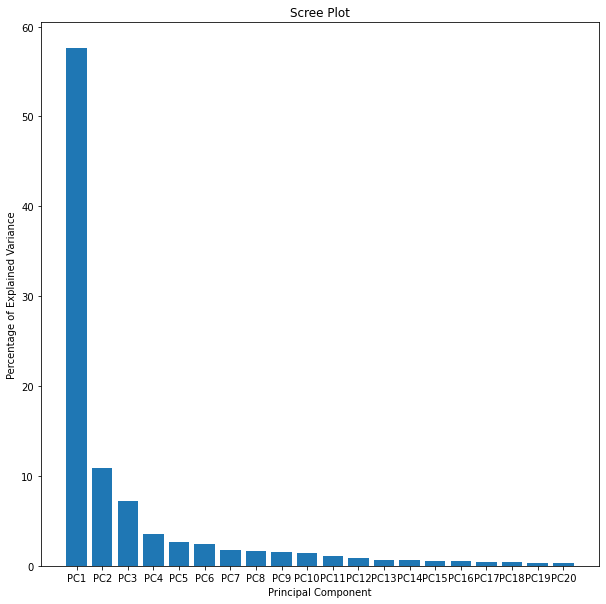

In [66]:
# Scree plot
per_var = np.round(pca.explained_variance_ratio_[:20]* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig = plt.figure(figsize=(10,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

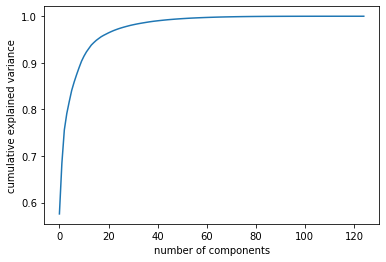

In [67]:
# Cumulative explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [68]:
pca2 = PCA(0.99)
x_pca1 = pca2.fit_transform(X_train_scaled)
x_pca1.shape

(268, 41)

In [69]:
# Grid serach

# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf', 'sigmoid']} 
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['sigmoid']} 

estimator = SVC(max_iter=10000)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=999)
    
grid = GridSearchCV(estimator, 
                    param_grid, 
                    cv=cv,
                    refit = True, 
                    verbose = 0)
  
# Fitting the model for grid search
grid.fit(x_pca1, y_train)

/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Convergence

/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Convergence

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=999, test_size=0.2,
            train_size=None),
             estimator=SVC(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [70]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [71]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1, max_iter=10000)


In [72]:
x_test_pca1 = pca2.transform(X_test_scaled)
yhat = grid.predict(x_test_pca1)
accuracy_score(y_test, yhat)

0.9705882352941176

In [73]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.97      0.97      0.97        34

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [75]:
pca3 = PCA(60)
x_pca3 = pca3.fit_transform(X_train_scaled)
x_pca3.shape

(268, 60)

In [76]:
# Grid serach

# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf', 'sigmoid']} 
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['sigmoid']} 

estimator = SVC(max_iter=10000)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=999)
    
grid = GridSearchCV(estimator, 
                    param_grid, 
                    cv=cv,
                    refit = True, 
                    verbose = 0)
  
# Fitting the model for grid search
grid.fit(x_pca3, y_train)

/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Convergence

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=999, test_size=0.2,
            train_size=None),
             estimator=SVC(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [77]:
print(grid.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [78]:
print(grid.best_estimator_)

SVC(C=10, max_iter=10000)


In [79]:
x_test_pca3 = pca3.transform(X_test_scaled)
yhat = grid.predict(x_test_pca3)
accuracy_score(y_test, yhat)

0.9852941176470589

In [81]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.97      1.00      0.99        34

    accuracy                           0.99        68
   macro avg       0.99      0.99      0.99        68
weighted avg       0.99      0.99      0.99        68



In [82]:
# final_svm = SVC(random_state=999, C=0.1, gamma='scale', kernel='linear', max_iter=10000)
# final_svm.fit(X_train_scaled, y_train)

In [83]:
# yhat = final_svm.predict(X_test)
# accuracy_score(y_test, yhat)

In [84]:
# cm = confusion_matrix(y_test, yhat, labels=final_svm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=final_svm.classes_)
# disp.plot()

# plt.show()